In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 

# Vetores aleatorios

In [23]:
x=np.random.normal(10,3,1000)

In [24]:
x.mean()

10.125129087348938

In [25]:
x.std()

2.903258923918405

<Figure size 1800x1200 with 0 Axes>

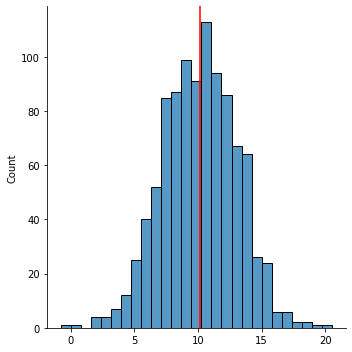

In [26]:
plt.figure(dpi=300)
sns.displot(x)
plt.axvline(x.mean(),color='red')

# Teste de shapiro- wilk

In [28]:
import scipy.stats as stats

In [29]:
e,p=stats.shapiro(x)

In [30]:
p

0.7225092053413391

In [32]:
def testenormal(x):
    e,p=stats.shapiro(x)
    texto="A série NÃO é normal"
    if p>0.05:
        texto="A série É é normal"
    return texto

In [33]:
testenormal(x)

'A série É é normal'

In [34]:
x2=np.random.randint(1,50,100)

<Figure size 1800x1200 with 0 Axes>

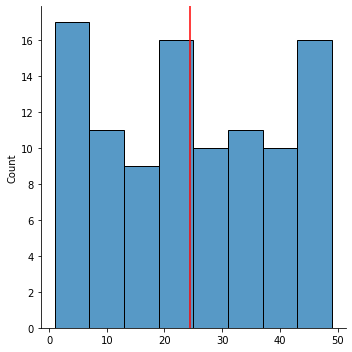

In [35]:
plt.figure(dpi=300)
sns.displot(x2)
plt.axvline(x2.mean(),color='red')

In [36]:
testenormal(x2)

'A série NÃO é normal'

## Dataframe

In [37]:
ser=pd.Series(x)

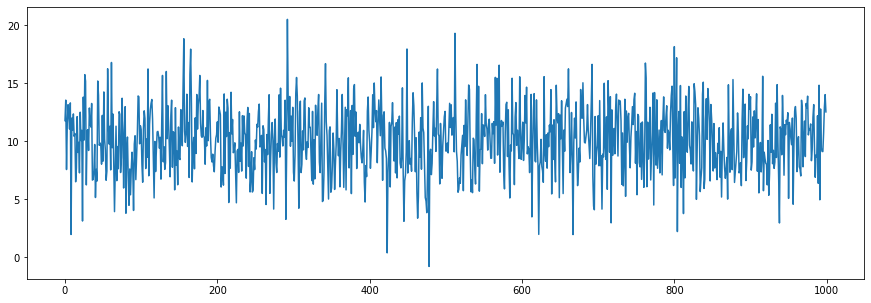

In [38]:
plt.figure(figsize=(15,5))
plt.plot(ser)

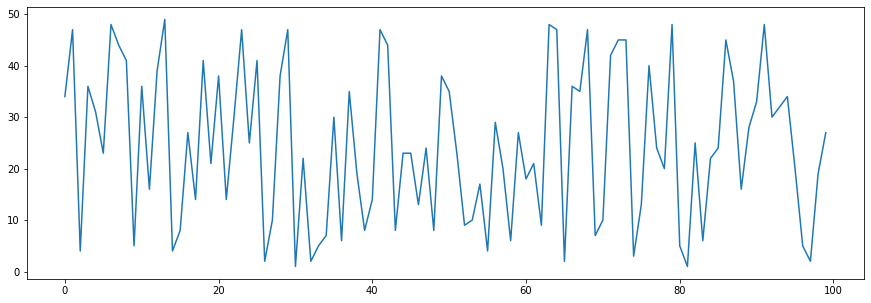

In [39]:
plt.figure(figsize=(15,5))
plt.plot(x2)

## Criar uma série

In [40]:
x=pd.to_datetime('10/1/2010')
y=pd.to_datetime('10/2/2010')

In [41]:
x

Timestamp('2010-10-01 00:00:00')

In [44]:
(x-y).days

-1

## Data_range

In [50]:
pd.date_range(start='23/1/2020',end='15/2/2021')

DatetimeIndex(['2020-01-23', '2020-01-24', '2020-01-25', '2020-01-26',
               '2020-01-27', '2020-01-28', '2020-01-29', '2020-01-30',
               '2020-01-31', '2020-02-01',
               ...
               '2021-02-06', '2021-02-07', '2021-02-08', '2021-02-09',
               '2021-02-10', '2021-02-11', '2021-02-12', '2021-02-13',
               '2021-02-14', '2021-02-15'],
              dtype='datetime64[ns]', length=390, freq='D')

In [52]:
pd.date_range(start='23/1/2020',periods=17)

DatetimeIndex(['2020-01-23', '2020-01-24', '2020-01-25', '2020-01-26',
               '2020-01-27', '2020-01-28', '2020-01-29', '2020-01-30',
               '2020-01-31', '2020-02-01', '2020-02-02', '2020-02-03',
               '2020-02-04', '2020-02-05', '2020-02-06', '2020-02-07',
               '2020-02-08'],
              dtype='datetime64[ns]', freq='D')

In [53]:
pd.date_range(start='23/1/2020',periods=17,freq='6H')

DatetimeIndex(['2020-01-23 00:00:00', '2020-01-23 06:00:00',
               '2020-01-23 12:00:00', '2020-01-23 18:00:00',
               '2020-01-24 00:00:00', '2020-01-24 06:00:00',
               '2020-01-24 12:00:00', '2020-01-24 18:00:00',
               '2020-01-25 00:00:00', '2020-01-25 06:00:00',
               '2020-01-25 12:00:00', '2020-01-25 18:00:00',
               '2020-01-26 00:00:00', '2020-01-26 06:00:00',
               '2020-01-26 12:00:00', '2020-01-26 18:00:00',
               '2020-01-27 00:00:00'],
              dtype='datetime64[ns]', freq='6H')

In [56]:
ser=pd.Series(ser.values,index=pd.date_range(start='1/1/2020',periods=len(ser)))

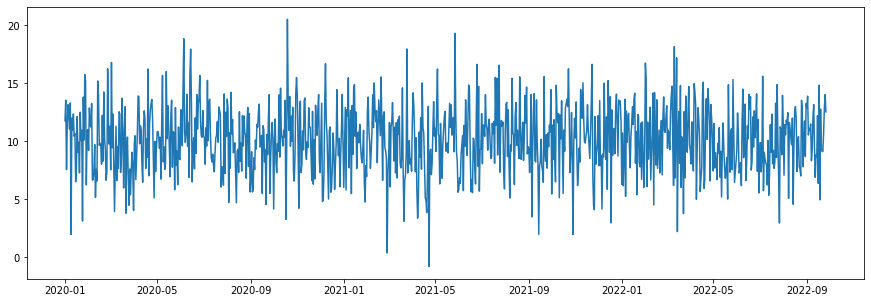

In [57]:
plt.figure(figsize=(15,5))
plt.plot(ser)

# Teste de estacionaridade

In [59]:
import statsmodels.tsa.stattools

In [64]:
kpss=statsmodels.tsa.stattools.kpss(ser)

<ipython-input-64-43b94797f480>:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss=statsmodels.tsa.stattools.kpss(ser)


In [65]:
kpss

(0.04345605714471412,
 0.1,
 3,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [66]:
kpss[0]

0.04345605714471412

In [67]:
kpss[3]['5%']

0.463

In [149]:
def testeestacionario(xx):
    kpssx=statsmodels.tsa.stattools.kpss(xx)
    valorcritico=kpssx[3]['5%']
    teste=kpssx[0]

    if teste>valorcritico:
        texto='A série NÃO é estacionária'
    else:
        texto="A série É estacionária"
        
    return texto

In [150]:
testeestacionario(ser.values)

<ipython-input-149-aa914e8778b0>:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpssx=statsmodels.tsa.stattools.kpss(xx)


'A série É estacionária'

In [111]:
x2=np.random.normal(10,0.5,1000)

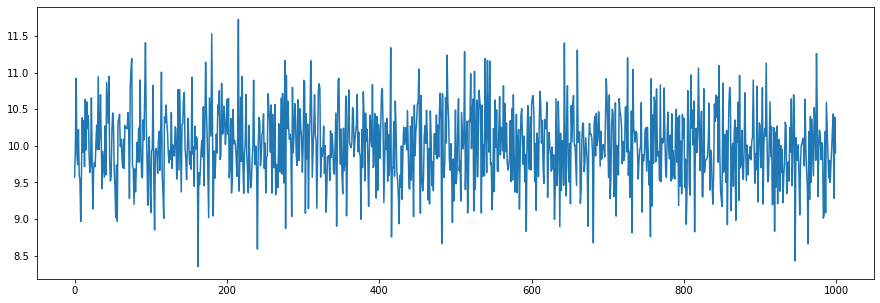

In [112]:
plt.figure(figsize=(15,5))
plt.plot(x2)

In [113]:
testeestacionario(x2)

'A série É estacionária'

# Dado Real

In [138]:
series=pd.read_csv('AirPassengers.csv')

In [139]:
series

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [140]:
series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [141]:
series['Month']=pd.to_datetime(series['Month'])

In [142]:
series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [143]:
series.set_index('Month',inplace=True)

In [144]:
series

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


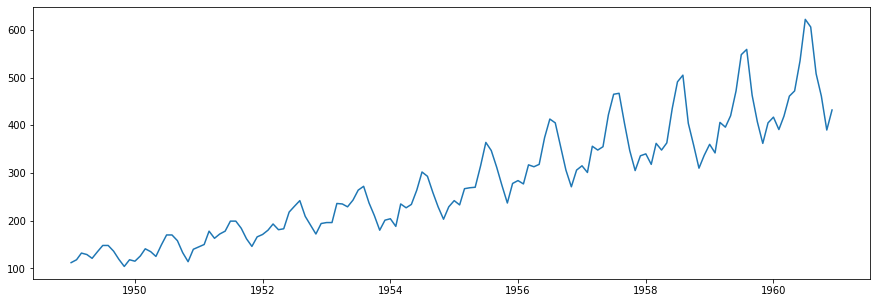

In [145]:
plt.figure(figsize=(15,5))
plt.plot(series)

In [147]:
testeestacionario(series)

<ipython-input-109-b6eef91b760b>:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpssx=statsmodels.tsa.stattools.kpss(xx)


'A série É estacionária'

In [123]:
series['#Passengers'].values

array([112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118, 115,
       126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140, 145, 150,
       178, 163, 172, 178, 199, 199, 184, 162, 146, 166, 171, 180, 193,
       181, 183, 218, 230, 242, 209, 191, 172, 194, 196, 196, 236, 235,
       229, 243, 264, 272, 237, 211, 180, 201, 204, 188, 235, 227, 234,
       264, 302, 293, 259, 229, 203, 229, 242, 233, 267, 269, 270, 315,
       364, 347, 312, 274, 237, 278, 284, 277, 317, 313, 318, 374, 413,
       405, 355, 306, 271, 306, 315, 301, 356, 348, 355, 422, 465, 467,
       404, 347, 305, 336, 340, 318, 362, 348, 363, 435, 491, 505, 404,
       359, 310, 337, 360, 342, 406, 396, 420, 472, 548, 559, 463, 407,
       362, 405, 417, 391, 419, 461, 472, 535, 622, 606, 508, 461, 390,
       432])

In [106]:
testenormal(series['#Passengers'].values)

'A série NÃO é normal'

# Média Móvel Simples

In [126]:
series.head(10)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


In [129]:
series.rolling(3).mean().head(10)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,120.666667
1949-04-01,126.333333
1949-05-01,127.333333
1949-06-01,128.333333
1949-07-01,134.666667
1949-08-01,143.666667
1949-09-01,144.000000


# MME

In [130]:
series.head(10)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


In [131]:
series.ewm(alpha=0.5).mean()

,#Passengers
Month,
1949-01-01,112.000000
1949-02-01,116.000000
1949-03-01,125.142857
1949-04-01,127.200000
1949-05-01,124.000000
...,...
1960-08-01,582.096411
1960-09-01,545.048205
1960-10-01,503.024103


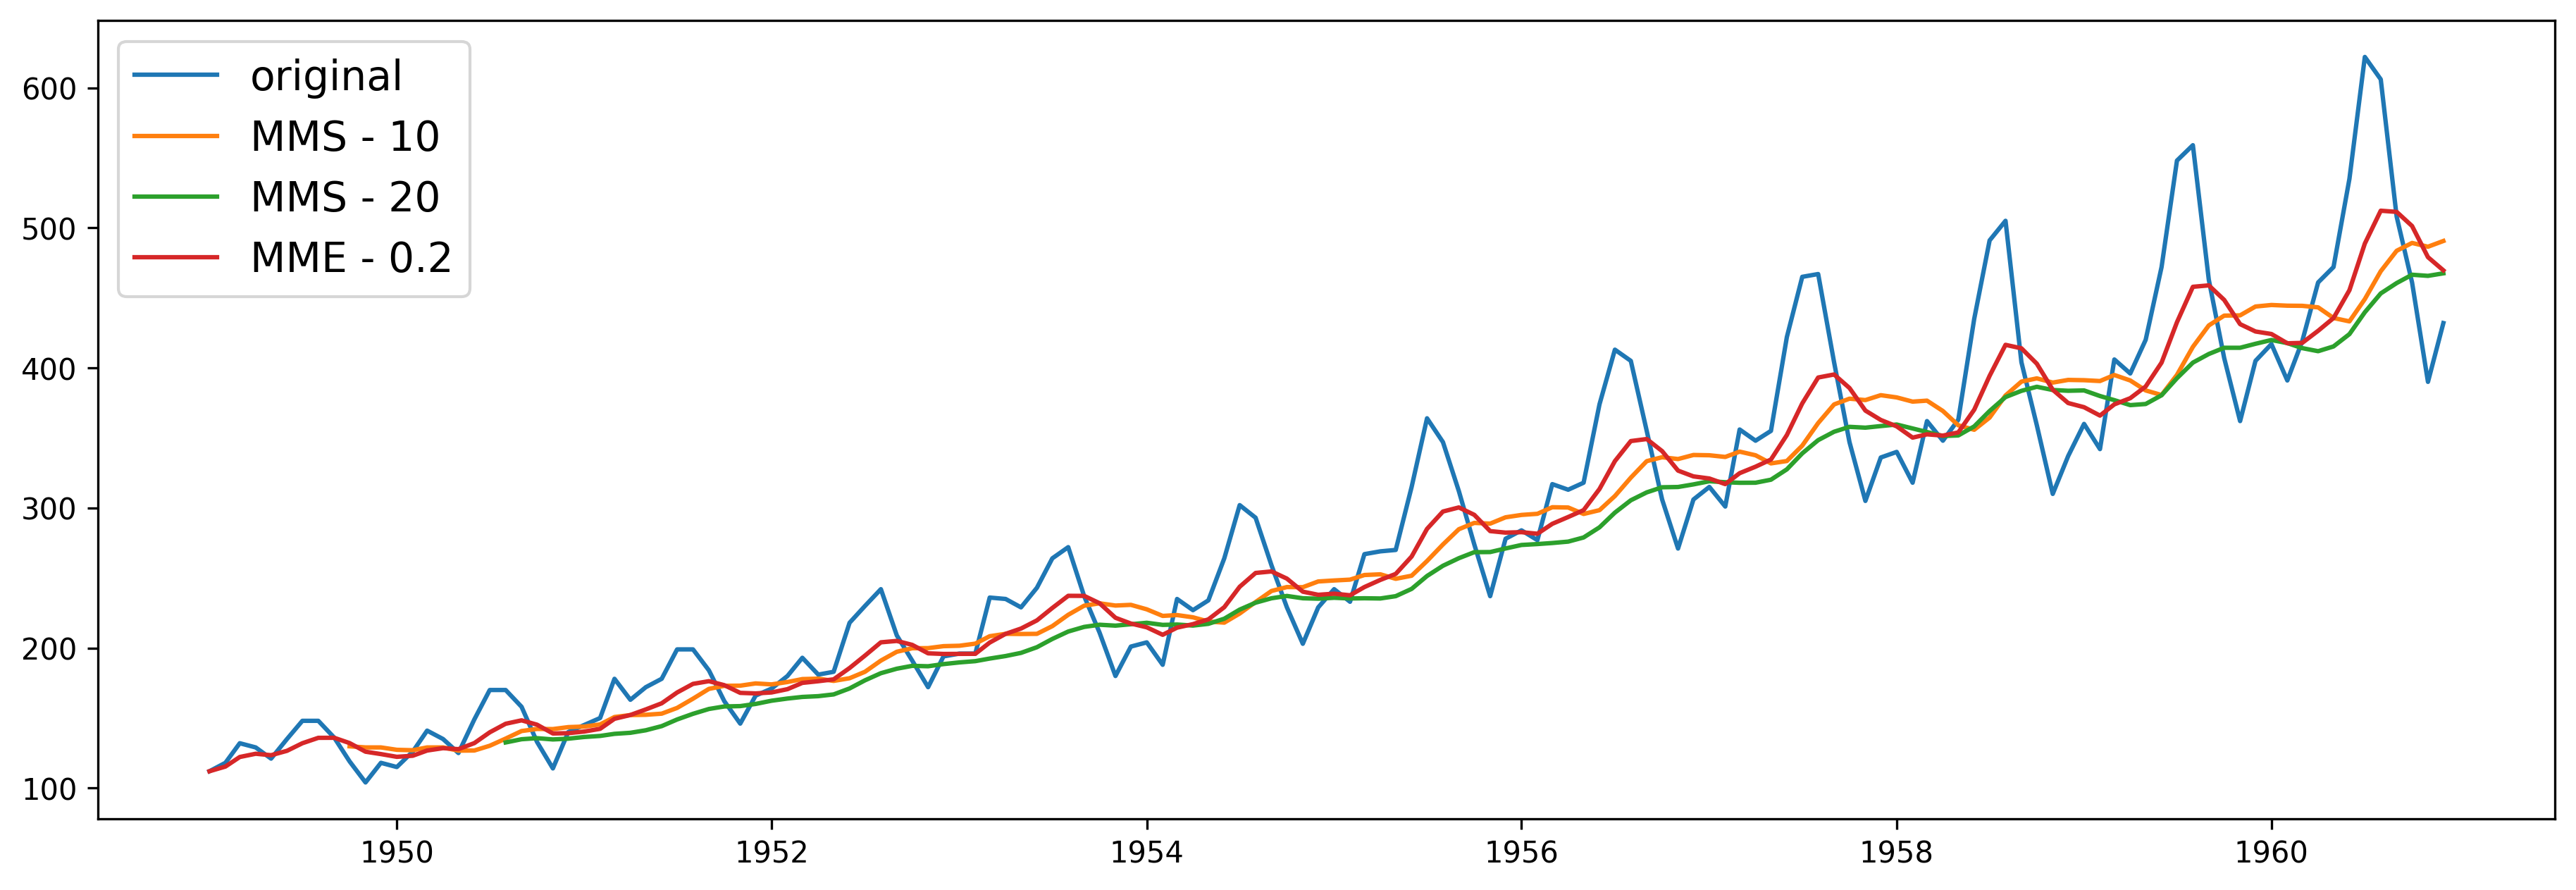

In [137]:
plt.figure(figsize=(15,5),dpi=300)
plt.plot(series,label='original')
plt.plot(series.rolling(10).mean(),label='MMS - 10')
plt.plot(series.rolling(20).mean(),label='MMS - 20')
plt.plot(series.ewm(alpha=0.2).mean(),label='MME - 0.2')
plt.legend(fontsize=14)